<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Tareas/TareasPPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criptografía

Consiste en hacer un código que se encargue de cifrar y descifrar texto de acuerdo al método
mostrado a continuación:
1. Este tipo de cifrado por columna con palabra clave consiste en formar una tabla con tantas
columnas como letras tenga la palabra clave; a continuación, se escribe el texto en la tabla
de izquierda a derecha y de arriba hacia abajo (sin espacios y, si hace falta, se rellenan los
espacios de la última fila con algún caracter):

Texto : LA CRIPTOGRAFIA ES ROMANTICA

Clave : HOLA

In [ ]:
clave = 'HOLA'
frase = 'LA CRIPTOGRAFIA ES ROMANTICA'

In [ ]:
frase = frase.replace(" ", "")
  # Obtener el número de columnas con la longitud de la clave
num_col = len(clave)
  # Calcular el número de filas necesario
num_fil = (len(frase) + num_col - ) / num_col
num = int((len(frase) + num_col) / num_col)
print(num_col,num_fil,num)


4 7.0 7


In [ ]:
def codificador(frase, clave):
  """
  ...
  """
  # Eliminar espacios
  frase = frase.replace(" ", "")
  # Obtener el número de columnas con la longitud de la clave
  num_col = len(clave)
  # Calcular el número de filas necesario
  num_fil = int((len(frase) + num_col) / num_col)
  # LLenar los espacios faltantes con un caracter
  residuo = len(frase) % num_col
  if len(frase) % num_col != 0:
    frase += '$' *(num_col-residuo)
  # Lista de listas para la tabla
  tabla = [[''] * num_col for _ in range(num_fil)]
  # Llenar la tabla
  k = 0
  for i in range(num_fil):
    for j in range(num_col):
      tabla[i][j] = frase[k]
      k += 1
  # Reordenar alfabeticamente
  clave_reordenada = ''.join(sorted(clave))
  tabla = [[fila[clave.index(letra)] for letra in clave_reordenada] for fila in tabla]

  # Frase reordenada
  frase_codificada = ''
  for j in range(len(clave_reordenada)):
    for fila in tabla:
      frase_codificada += fila[j]

  return frase_codificada

In [ ]:
codificador(frase, clave)

'ROFSAC$LIGIRNACTAEMI$APRAOT$'

In [ ]:
def cifrar(texto, clave):
    # Eliminar espacios y convertir el texto en mayúsculas
    texto = texto.replace(" ", "").upper()

    # Calcular el número de columnas en función de la longitud de la clave
    num_columnas = len(clave)

    # Calcular el número de filas necesario
    num_filas = (len(texto) + num_columnas - 1) // num_columnas

    # Rellenar la última fila con 'X' si es necesario
    if len(texto) % num_columnas != 0:
        texto += 'X' * (num_columnas - len(texto) % num_columnas)

    # Crear una lista de listas para la tabla
    tabla = [[''] * num_columnas for _ in range(num_filas)]

    # Llenar la tabla con el texto de izquierda a derecha y de arriba hacia abajo
    k = 0
    for i in range(num_filas):
        for j in range(num_columnas):
            tabla[i][j] = texto[k]
            k += 1

    # Reordenar las columnas alfabéticamente según la clave
    clave_ordenada = ''.join(sorted(clave))
    tabla = [[fila[clave.index(letra)] for letra in clave_ordenada] for fila in tabla]

    # Obtener el texto cifrado por columna
    texto_cifrado = ''.join([''.join(fila) for fila in tabla])

    return texto_cifrado

def descifrar(texto_cifrado, clave):
    # Calcular el número de columnas en función de la longitud de la clave
    num_columnas = len(clave)

    # Calcular el número de filas necesario
    num_filas = len(texto_cifrado) // num_columnas

    # Crear una lista de listas para la tabla
    tabla = [[''] * num_columnas for _ in range(num_filas)]

    # Llenar la tabla con el texto cifrado por columna
    k = 0
    for i in range(num_filas):
        for j in range(num_columnas):
            tabla[i][j] = texto_cifrado[k]
            k += 1

    # Reordenar las columnas alfabéticamente según la clave
    clave_ordenada = ''.join(sorted(clave))
    tabla = [[fila[clave_ordenada.index(letra)] for letra in clave] for fila in tabla]

    # Obtener el texto original de izquierda a derecha y de arriba hacia abajo
    texto_original = ''.join([''.join(fila) for fila in tabla])

    return texto_original

# Ejemplo de cifrado y descifrado
texto = "LA CRIPTOGRAFIA ES ROMANTICA"
clave = "HOLA"

# Cifrar el texto
texto_cifrado = cifrar(texto, clave)
print("Texto cifrado:", texto_cifrado)

# Descifrar el texto
texto_descifrado = descifrar(texto_cifrado, clave)
print("Texto descifrado:", texto_descifrado)


Texto cifrado: RLCAOITPFGARSIEAARMOCNITXAXX
Texto descifrado: LACRIPTOGRAFIAESROMANTICAXXX


# Lasso, Ridge, ElasticNet

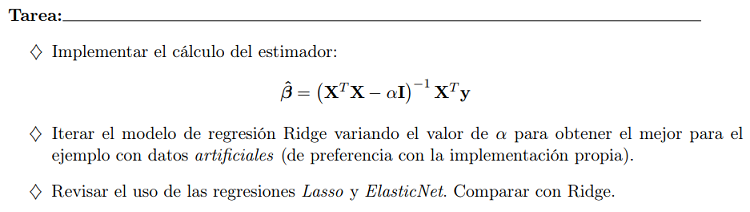

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

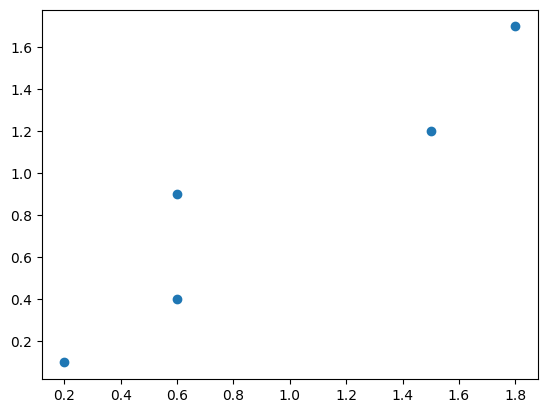

In [ ]:
X = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
plt.scatter(x,y)

In [ ]:
# Datos de ejemplo (X y y)
#X = [[1, 2], [2, 3], [3, 4], [4, 5]]
#y = [2, 3, 4, 5]

# Obtener las dimensiones de X
n = len(X)
p = len(X[0])

# Inicializar las matrices y vectores
XT = [[0] * n for _ in range(p)]
for i in range(p):
    for j in range(n):
        XT[i][j] = X[j][i]

# Calcular XT*X
XTX = [[0] * p for _ in range(p)]
for i in range(p):
    for j in range(p):
        for k in range(n):
            XTX[i][j] += XT[i][k] * X[k][j]

# Calcular XT*y
XTy = [0] * p
for i in range(p):
    for j in range(n):
        XTy[i] += XT[i][j] * y[j]

# Calcular (XTX)^(-1)
# Puedes usar un algoritmo de inversión de matriz, como Gauss-Jordan, si p es pequeño.
# Sin embargo, ten en cuenta que esto puede no ser eficiente para matrices grandes.
# Para matrices grandes, es preferible usar numpy u otra biblioteca.
def inverse_matrix(matrix):
    n = len(matrix)

    # Crear una matriz aumentada [matrix | I]
    augmented_matrix = [row + [0] * n for row in matrix]
    for i in range(n):
        augmented_matrix[i][n + i] = 1

    # Aplicar eliminación gaussiana para obtener la matriz identidad en la izquierda
    for col in range(n):
        pivot_row = None
        for row in range(col, n):
            if augmented_matrix[row][col] != 0:
                pivot_row = row
                break
        if pivot_row is None:
            raise ValueError("La matriz no es invertible")

        augmented_matrix[col], augmented_matrix[pivot_row] = augmented_matrix[pivot_row], augmented_matrix[col]

        pivot_val = augmented_matrix[col][col]
        for j in range(n + n):
            augmented_matrix[col][j] /= pivot_val
        for row in range(n):
            if row != col:
                factor = augmented_matrix[row][col]
                for j in range(n + n):
                    augmented_matrix[row][j] -= factor * augmented_matrix[col][j]

    # Extraer la matriz inversa de la parte derecha de la matriz aumentada
    inverse = [row[n:] for row in augmented_matrix]

    return inverse


# Calcular β
beta_hat = [0] * p
if p < 4:
    # Si p es pequeño, calcula la inversión de matriz manualmente
    XTX_inverse = inverse_matrix(XTX)
    for i in range(p):
        for j in range(p):
            beta_hat[i] += XTX_inverse[i][j] * XTy[j]
else:
    # Para p grande, es mejor usar una biblioteca de álgebra lineal como numpy
    print("No se puede calcular el estimador de mínimos cuadrados porque p es demasiado grande")

# Imprimir el resultado
print("Estimador de mínimos cuadrados (beta_hat):", beta_hat)

Estimador de mínimos cuadrados (beta_hat): [0.0, 1.0]
